In [50]:
import tensorflow as tf
import numpy as np
import mmml.helpers as hlp
session=tf.Session()

In [51]:
a = np.array([[1,2,3],[3,4,5],[1,3,5],[2,4,6]])
a = tf.convert_to_tensor(a)
b = np.array([0,1,2,3,2,1,0])
b = tf.convert_to_tensor(b)
c = tf.nn.embedding_lookup(a, b)
session.run([c])
m = hlp.file_read_all_text(r'dataset\dict.txt', 'utf-8')
len(m)

6422

In [52]:
with tf.Graph().as_default():
    with tf.name_scope("ns1"):
        v1 = tf.Variable([0,1,2], name="v1")
        print(v1.name)  # ns1/v1:0
    with tf.variable_scope("vs1", initializer=init):
        v2 = tf.get_variable("v2", initializer=[4,5,6])
        print(v2.name)  # vs1/v2:0
        v3 = tf.get_variable("v3", shape=[2, 2])
    init = tf.random_uniform_initializer(-3, 1)
    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        print(session.run([v1, v2, v3]))
    with tf.train.MonitoredTrainingSession() as session:
        print(session.run([v1, v2, v3]))

ns1/v1:0
vs1/v2:0
[array([0, 1, 2]), array([4, 5, 6]), array([[-2.0831404 ,  0.30631208],
       [-0.0551939 , -0.00659895]], dtype=float32)]
INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


[array([0, 1, 2]), array([4, 5, 6]), array([[ 0.45706367,  0.23454714],
       [-1.1490989 ,  0.6374192 ]], dtype=float32)]


In [65]:
import pyaudio
p = pyaudio.PyAudio()
stream = p.open(format=pyaudio.paInt16,
                channels=1, rate=44100, input=True, output=True,
                frames_per_buffer=1024)
print("Recording")
frames = []
for i in range(0, int(44100/1024*2)):
    data = stream.read(1024)
    frames.append(data)
print("Finish")
stream.write(b''.join(frames))
stream.stop_stream()
stream.close()
p.terminate()

Recording


Finish


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sys import byteorder
a = [int.from_bytes(frames[55][i*2:i*2+2], byteorder) for i in range(1024)]
plt.plot(a)

NameError: name 'frames' is not defined

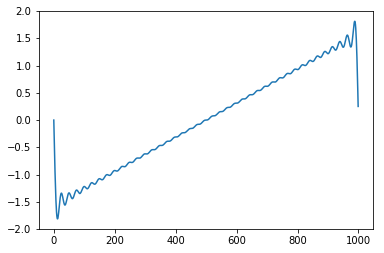

In [ ]:
import math
n = 1000; k = 5; y = []
for i in range(n):
    x = (i - (n / 2)) / n * 2 * math.pi
    s = 0
    for j in range(k):
        if j % 2 == 0:
            s = s + math.sin(x * (j + 1)) / (j + 1)
        else:
            s = s - math.sin(x * (j + 1)) / (j + 1)
    y = y + [s]
plt.plot(y)